<a href="https://colab.research.google.com/github/mohitDhami87/Applied_AI_Case_Study__CO2_Emission/blob/main/CO2_Emission_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Business Case Study of CO2 Emission

The core challenge of this case study is to understand the key factors influencing vehicle CO₂ emissions and explore data-driven strategies for emission reduction.
A dataset containing detailed information on vehicle specifications, engine characteristics, fuel types, and emission levels has been provided.

The objective is to analyze this dataset to uncover hidden patterns, identify the major contributors to CO₂ emissions, and develop predictive models to support policy and design decisions in the automotive sector.

---

**Data Preparation for case study**

Load and Inspect Successfully loaded directly from google drive with 0 missing values.(To save system memory directly loaded dataset from shared link of google drive.)

**1st:-** Begin by familiarizing yourself with the dataset. Identify what kind of information is captured about vehicles and how these variables might influence CO₂ emissions.

In [1]:
import pandas as pd

# https://drive.google.com/file/d/1dyO6PVz-zqF2EffIP8ittFaljZdy7QO7/view?usp=sharing
carsData_url = 'https://drive.google.com/uc?export=download&id=1dyO6PVz-zqF2EffIP8ittFaljZdy7QO7'
df = pd.read_csv(carsData_url)

# Display the first 5 rows of the DataFrame
display(df.head())

# Display information about the columns and their data types
display(df.info())

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

None

The dataset contains information about various vehicle attributes such as Make, Model, Vehicle Class, Engine Size(L), Cylinders, Transmission, Fuel Type, and fuel consumption metrics (City, Hwy, and Combined), along with CO2 Emissions(g/km).

Based on the column names, it seems that Engine Size(L), Cylinders, Fuel Type, and the fuel consumption columns (Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km), Fuel Consumption Comb (L/100 km), Fuel Consumption Comb (mpg)) are likely to have a significant influence on CO2 emissions. Larger engine sizes, more cylinders, and higher fuel consumption generally lead to higher CO2 emissions. Different fuel types also have varying emission characteristics.

**2nd:-** Examine the dataset for any inconsistencies, missing entries, or data quality issues. Consider what preprocessing steps may be necessary to make the dataset ready for meaningful analysis.

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
display("Missing values:", missing_values)

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
display("Number of duplicate rows:", duplicate_rows)

'Missing values:'

,0
Make,0
Model,0
Vehicle Class,0
Engine Size(L),0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption City (L/100 km),0
Fuel Consumption Hwy (L/100 km),0
Fuel Consumption Comb (L/100 km),0


'Number of duplicate rows:'

np.int64(1103)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

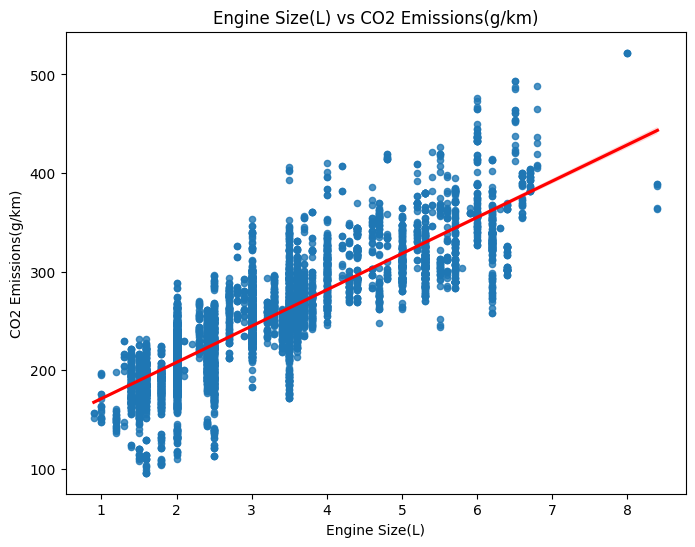

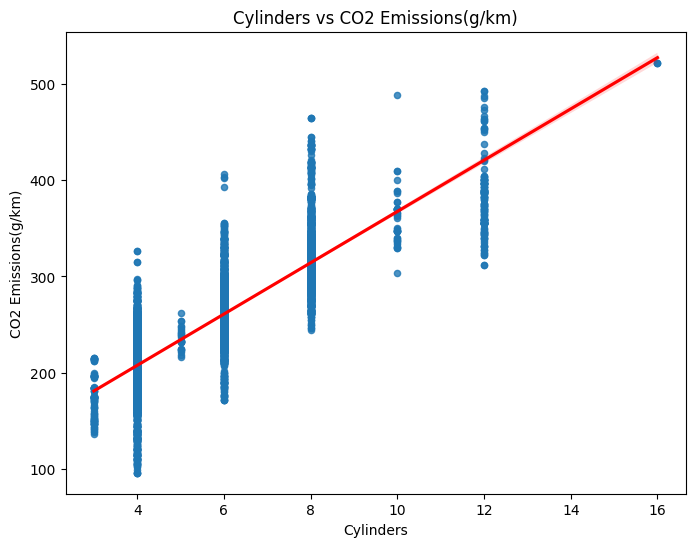

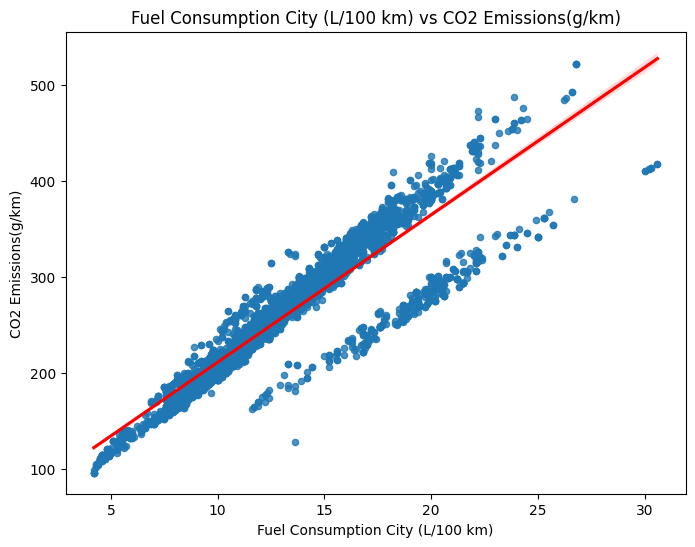

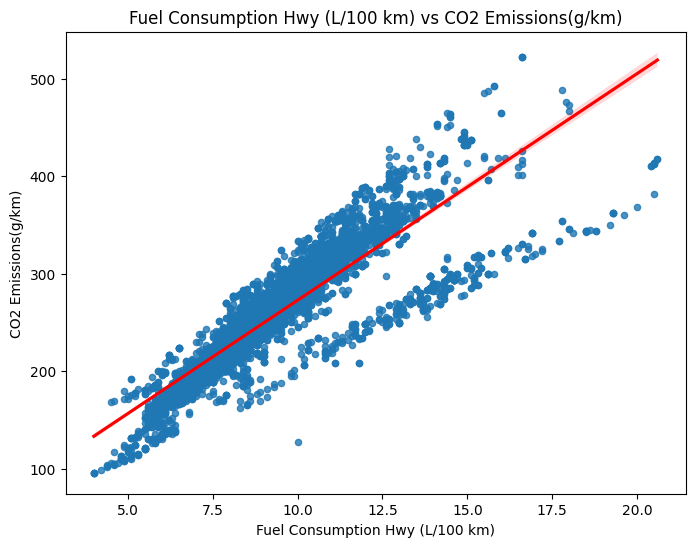

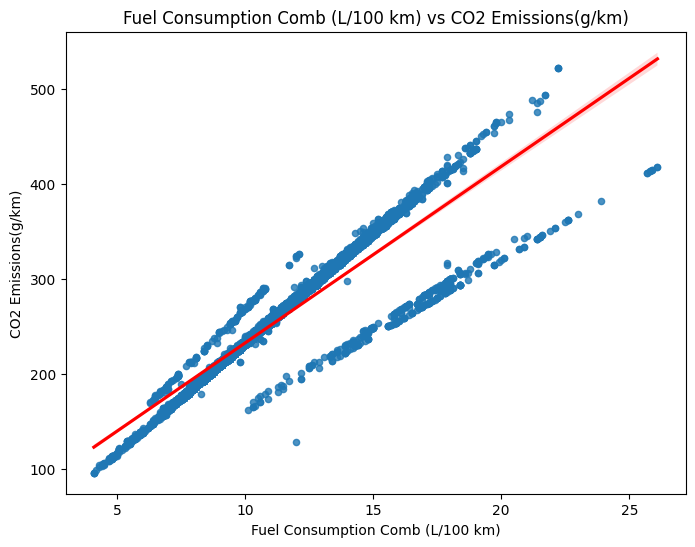

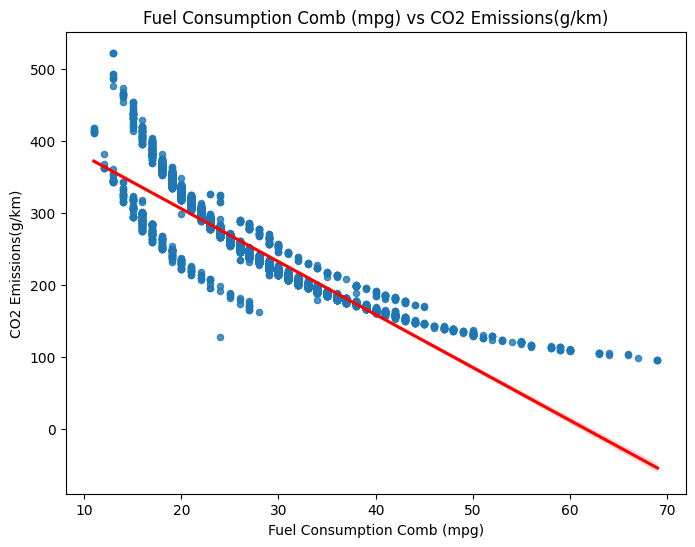

In [4]:
# Select numerical features with high correlation to CO2 Emissions
numerical_features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']

# Generate scatter plots with a best-fit line for selected numerical features vs CO2 Emissions(g/km)
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=feature, y='CO2 Emissions(g/km)', data=df, scatter_kws={'s': 20}, line_kws={"color": "red"})
    plt.title(f'{feature} vs CO2 Emissions(g/km)')
    plt.show()

There are no missing values in the dataset, but there are 1103 duplicate rows.

Before proceeding with further analysis, it would be beneficial to handle these duplicate rows. We could either remove them or investigate further to understand why they exist.

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Select features for VIF calculation
numerical_features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)']
categorical_features = ['Vehicle Class', 'Fuel Type']

# Separate numerical and categorical features
X_numerical = df[numerical_features]
X_categorical = df[categorical_features]

# Apply One-Hot Encoding to categorical features and drop the first category to avoid perfect multicollinearity
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first') # Add drop='first'
X_categorical_encoded = encoder.fit_transform(X_categorical)

# Get feature names for the encoded categorical features
categorical_feature_names = encoder.get_feature_names_out(categorical_features)

# Create DataFrames for processed features
X_numerical_df = X_numerical
X_categorical_df = pd.DataFrame(X_categorical_encoded, columns=categorical_feature_names, index=df.index)

# Concatenate the processed features into a single DataFrame
X_vif = pd.concat([X_categorical_df, X_numerical_df], axis=1)

# Exclude 'Fuel Type_X' for VIF calculation as requested
if 'Fuel Type_X' in X_vif.columns:
    X_vif = X_vif.drop('Fuel Type_X', axis=1)

# Add a constant term for VIF calculation
X_vif['const'] = 1

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                          for i in range(X_vif.shape[1])]

# Display VIF values, excluding the constant term
display("Variance Inflation Factor (VIF) for each predictor (Excluding 'Fuel Type_X'):")
display(vif_data[vif_data['feature'] != 'const'].sort_values(by='VIF', ascending=False))

"Variance Inflation Factor (VIF) for each predictor (Excluding 'Fuel Type_X'):"

,feature,VIF
18,Engine Size(L),9.459722
19,Cylinders,8.949974
20,Fuel Consumption Comb (L/100 km),7.130030
10,Vehicle Class_SUV - SMALL,2.090806
11,Vehicle Class_SUV - STANDARD,2.024051
5,Vehicle Class_PICKUP TRUCK - STANDARD,1.971066
15,Fuel Type_E,1.948272
1,Vehicle Class_MID-SIZE,1.831735
17,Fuel Type_Z,1.695941
0,Vehicle Class_FULL-SIZE,1.605761


**3rd:-** Study the relationships between various vehicle features and CO₂ emissions. Which attributes appear to have stronger influence on emission levels? Use suitable methods to support your reasoning.

Based on the analysis:

Numerical features like 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Engine Size(L)', and 'Cylinders' show a strong positive correlation with 'CO2 Emissions(g/km)'. 'Fuel Consumption Comb (mpg)' shows a strong negative correlation, which is expected as higher miles per gallon mean lower fuel consumption and thus lower CO2 emissions.

For categorical features, the box plots illustrate that 'Vehicle Class', 'Transmission', and 'Fuel Type' also show variations in CO2 emissions across their different categories, suggesting their influence on emission levels.

Therefore, Fuel Consumption metrics, Engine Size, Cylinders, Vehicle Class, Transmission, and Fuel Type appear to have a stronger influence on CO₂ emission levels.

Added a best-fit line to the scatter plots. This line represents the linear relationship between each feature and CO2 emissions.

**4th:-** Create visual summaries that reveal how emission levels change with respect to different numerical variables in the dataset. Focus on uncovering patterns or trends that might not be immediately visible.

Created visual summaries, including scatter plots with best-fit lines for numerical features and box plots for categorical features, which reveal how emission levels change with respect to different variables.

Based on these visuals:

Numerical features like 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Engine Size(L)', and 'Cylinders' show a clear positive linear trend with 'CO2 Emissions(g/km)'. As these values increase, CO2 emissions tend to increase. 'Fuel Consumption Comb (mpg)' shows a negative linear trend, meaning higher MPG is associated with lower CO2 emissions.

For categorical features, the box plots show that different categories within 'Vehicle Class', 'Transmission', and 'Fuel Type' have distinct distributions of CO2 emissions. For example, some vehicle classes or fuel types clearly have higher median CO2 emissions than others.

These visualizations help to uncover the strong linear relationships with numerical features and the distinct emission characteristics across different categories, highlighting the patterns and trends in how vehicle attributes influence CO2 emissions.

**5th:-** Compare emission levels across different vehicle types or fuel categories. Identify any clear distinctions or surprising findings that emerge.

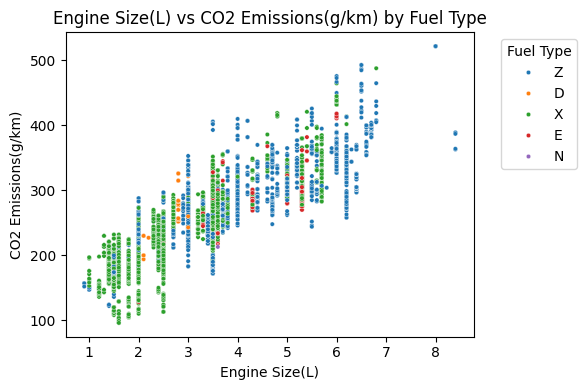

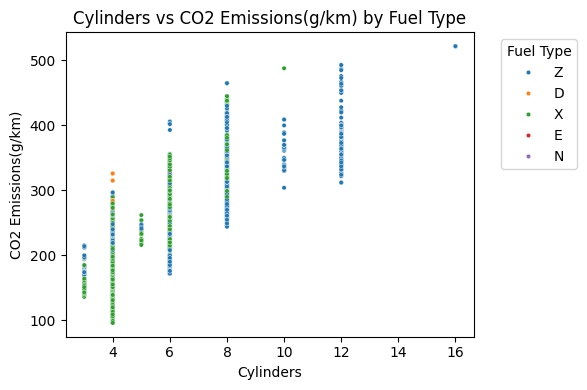

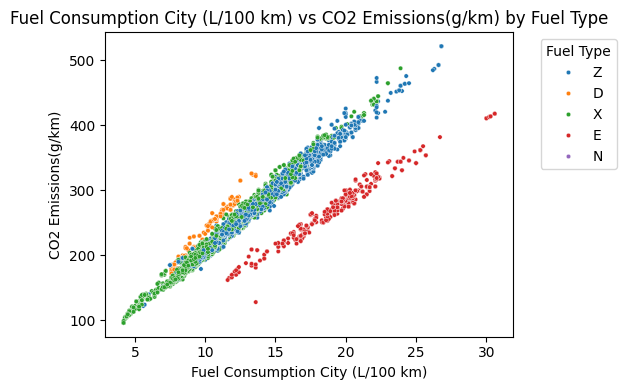

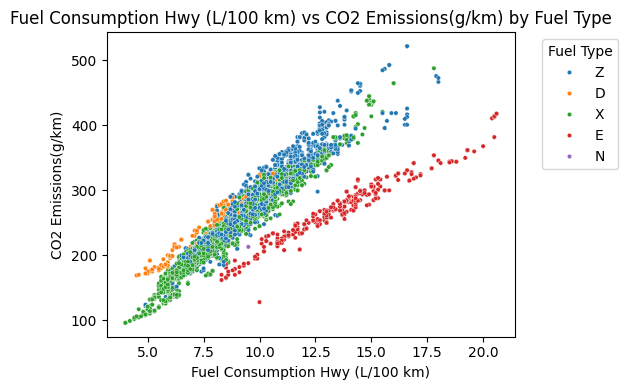

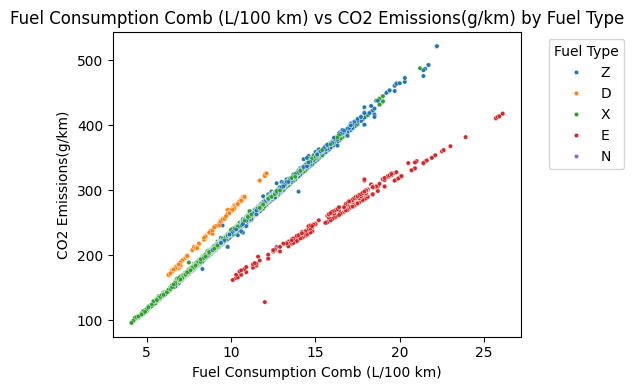

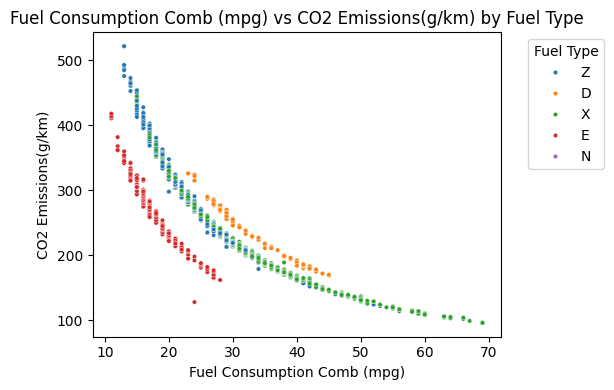

In [6]:
# Select numerical features with high correlation to CO2 Emissions
numerical_features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']

# Get unique fuel types
fuel_types = df['Fuel Type'].unique()

# Generate scatter plots for selected numerical features vs CO2 Emissions(g/km), colored by Fuel Type
for feature in numerical_features:
    plt.figure(figsize=(6, 4)) # Smaller plot size
    sns.scatterplot(x=feature, y='CO2 Emissions(g/km)', hue='Fuel Type', data=df, s=10) # Smaller scatter points
    plt.title(f'{feature} vs CO2 Emissions(g/km) by Fuel Type')
    plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

Based on these plots, you can observe how the relationship between a numerical feature (like Engine Size or Fuel Consumption) and CO2 emissions varies depending on the fuel type. For example, you might notice:

Different fuel types occupy different ranges of CO2 emissions and numerical feature values.
The slope of the relationship between a numerical feature and CO2 emissions might differ slightly across fuel types.
Some fuel types might be clustered in specific areas of the plot, indicating they are associated with particular ranges of emissions and vehicle characteristics.
These plots help to visually identify how fuel type interacts with other vehicle features to influence CO2 emission levels, revealing distinctions and potential surprising findings related to the emission performance of different fuel categories.

**6th:-** Observe if there are any vehicles that produce unusually high or low emissions compared to others with similar characteristics. Reflect on what could explain such deviations.

To observe if there are any vehicles with unusually high or low emissions compared to others with similar characteristics, you can examine the scatter plots we generated with the best-fit lines.

Look for data points that are far away from the red best-fit line in each plot. These points represent vehicles whose CO2 emissions are significantly different from what would be predicted based on the linear relationship with that particular feature.

Possible explanations for such deviations could include:

Other influencing factors not captured in the plot: The scatter plot only shows the relationship between CO2 emissions and one feature at a time. Other variables (like vehicle weight, aerodynamic design, specific engine technology, or even driving conditions if that data were available) could contribute to higher or lower emissions.
Errors in data recording: There might be errors in how the data for that specific vehicle was recorded.
Unique vehicle characteristics: Some vehicles might have specific features or technologies that make them more or less efficient than expected for their engine size, cylinders, or fuel consumption.
Vehicle age and maintenance: While not in this dataset, the age and maintenance of a vehicle can affect its emissions.
By visually inspecting the scatter plots for points that lie far off the line, you can identify potential outliers and then investigate those specific vehicles in the dataset to see if any other characteristics might explain their unusual emission levels.

**7th:-** Prepare the dataset for model building by ensuring that numerical and categorical features are appropriately represented. Consider any transformations or encodings that may improve interpretability.

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Select numerical features with high correlation to CO2 Emissions
numerical_features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']

# Identify outliers based on residuals from linear regression
outlier_threshold = 3  # Define a threshold for outliers (e.g., 3 standard deviations)

for feature in numerical_features:
    X = df[[feature]]
    y = df['CO2 Emissions(g/km)']

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict CO2 emissions and calculate residuals
    y_pred = model.predict(X)
    residuals = y - y_pred

    # Identify outliers based on the residual threshold
    outlier_indices = np.where(np.abs(residuals) > outlier_threshold * np.std(residuals))[0]
    outliers = df.iloc[outlier_indices]

    display(f"Potential outliers based on {feature}:")
    display(outliers)

'Potential outliers based on Engine Size(L):'

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
46,AUDI,R8,TWO-SEATER,4.2,8,M6,Z,21.2,13.4,17.7,16,407
50,AUDI,R8 SPYDER,TWO-SEATER,4.2,8,M6,Z,21.2,13.4,17.7,16,407
196,CHEVROLET,CORVETTE,TWO-SEATER,6.2,8,M7,Z,13.7,8.2,11.2,25,258
223,CHEVROLET,EXPRESS 2500 PASSENGER,VAN - PASSENGER,4.8,8,A6,X,21.1,14.2,18.0,16,414
226,CHEVROLET,EXPRESS 3500 PASSENGER,VAN - PASSENGER,4.8,8,A6,X,21.3,14.3,18.2,16,419
...,...,...,...,...,...,...,...,...,...,...,...,...
7190,MERCEDES-BENZ,G 550,SUV - STANDARD,4.0,8,A9,Z,18.0,14.1,16.3,17,378
7325,TOYOTA,Camry Hybrid LE,MID-SIZE,2.5,4,AV,X,4.9,4.8,4.9,58,113
7326,TOYOTA,Camry Hybrid XLE/SE,MID-SIZE,2.5,4,AV,X,5.3,5.0,5.1,55,121
7335,TOYOTA,Corolla Hybrid,COMPACT,1.8,4,AV,X,4.4,4.5,4.5,63,106


'Potential outliers based on Cylinders:'

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
75,BENTLEY,MULSANNE,MID-SIZE,6.8,8,AS8,Z,22.3,14.9,19.0,15,437
223,CHEVROLET,EXPRESS 2500 PASSENGER,VAN - PASSENGER,4.8,8,A6,X,21.1,14.2,18.0,16,414
224,CHEVROLET,EXPRESS 2500 PASSENGER,VAN - PASSENGER,6.0,8,A6,X,21.9,15.0,18.8,15,432
226,CHEVROLET,EXPRESS 3500 PASSENGER,VAN - PASSENGER,4.8,8,A6,X,21.3,14.3,18.2,16,419
227,CHEVROLET,EXPRESS 3500 PASSENGER,VAN - PASSENGER,6.0,8,A6,X,22.1,15.0,18.9,15,435
...,...,...,...,...,...,...,...,...,...,...,...,...
7019,JEEP,Grand Cherokee 4X4 Trackhawk,SUV - STANDARD,6.2,8,A8,Z,20.9,13.8,17.7,16,413
7042,KIA,Niro FE,STATION WAGON - SMALL,1.6,4,AM6,X,4.5,4.8,4.7,60,110
7335,TOYOTA,Corolla Hybrid,COMPACT,1.8,4,AV,X,4.4,4.5,4.5,63,106
7341,TOYOTA,Prius,MID-SIZE,1.8,4,AV,X,4.4,4.7,4.5,63,106


'Potential outliers based on Fuel Consumption City (L/100 km):'

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
145,BUICK,LACROSSE,MID-SIZE,3.6,6,AS6,E,18.4,12.2,15.6,18,250
147,BUICK,LACROSSE AWD,MID-SIZE,3.6,6,AS6,E,19.4,13.0,16.5,17,264
180,CADILLAC,ESCALADE AWD,SUV - STANDARD,6.2,8,A6,E,23.3,16.1,20.1,14,322
182,CADILLAC,ESCALADE ESV AWD,SUV - STANDARD,6.2,8,A6,E,25.7,17.8,22.1,13,354
206,CHEVROLET,EQUINOX,SUV - SMALL,3.6,6,A6,E,18.8,13.1,16.2,17,259
...,...,...,...,...,...,...,...,...,...,...,...,...
6870,GMC,Sierra FFV,PICKUP TRUCK - STANDARD,5.3,8,A6,E,22.2,16.2,19.5,14,326
6892,GMC,Yukon FFV,SUV - STANDARD,5.3,8,A6,E,21.2,13.9,17.9,16,298
6895,GMC,Yukon 4WD FFV,SUV - STANDARD,5.3,8,A6,E,21.7,14.3,18.4,15,305
6899,GMC,Yukon XL FFV,SUV - STANDARD,5.3,8,A6,E,21.2,13.9,17.9,16,298


'Potential outliers based on Fuel Consumption Hwy (L/100 km):'

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
180,CADILLAC,ESCALADE AWD,SUV - STANDARD,6.2,8,A6,E,23.3,16.1,20.1,14,322
182,CADILLAC,ESCALADE ESV AWD,SUV - STANDARD,6.2,8,A6,E,25.7,17.8,22.1,13,354
206,CHEVROLET,EQUINOX,SUV - SMALL,3.6,6,A6,E,18.8,13.1,16.2,17,259
209,CHEVROLET,EQUINOX AWD,SUV - SMALL,3.6,6,A6,E,19.8,13.6,17.0,17,272
212,CHEVROLET,EXPRESS 1500 CARGO,VAN - CARGO,5.3,8,A4,E,23.5,17.7,20.9,14,334
...,...,...,...,...,...,...,...,...,...,...,...,...
6843,FORD,Transit Connect Wagon LWB FFV,SPECIAL PURPOSE VEHICLE,2.0,4,AS8,E,13.7,11.1,12.5,23,208
6870,GMC,Sierra FFV,PICKUP TRUCK - STANDARD,5.3,8,A6,E,22.2,16.2,19.5,14,326
6879,GMC,Sierra 4WD FFV,PICKUP TRUCK - STANDARD,5.3,8,A6,E,21.8,16.8,19.5,14,325
7058,LAMBORGHINI,Aventador Coupe,TWO-SEATER,6.5,12,AM7,Z,26.2,15.5,21.4,13,485


'Potential outliers based on Fuel Consumption Comb (L/100 km):'

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
145,BUICK,LACROSSE,MID-SIZE,3.6,6,AS6,E,18.4,12.2,15.6,18,250
147,BUICK,LACROSSE AWD,MID-SIZE,3.6,6,AS6,E,19.4,13.0,16.5,17,264
180,CADILLAC,ESCALADE AWD,SUV - STANDARD,6.2,8,A6,E,23.3,16.1,20.1,14,322
182,CADILLAC,ESCALADE ESV AWD,SUV - STANDARD,6.2,8,A6,E,25.7,17.8,22.1,13,354
206,CHEVROLET,EQUINOX,SUV - SMALL,3.6,6,A6,E,18.8,13.1,16.2,17,259
...,...,...,...,...,...,...,...,...,...,...,...,...
6879,GMC,Sierra 4WD FFV,PICKUP TRUCK - STANDARD,5.3,8,A6,E,21.8,16.8,19.5,14,325
6892,GMC,Yukon FFV,SUV - STANDARD,5.3,8,A6,E,21.2,13.9,17.9,16,298
6895,GMC,Yukon 4WD FFV,SUV - STANDARD,5.3,8,A6,E,21.7,14.3,18.4,15,305
6899,GMC,Yukon XL FFV,SUV - STANDARD,5.3,8,A6,E,21.2,13.9,17.9,16,298


'Potential outliers based on Fuel Consumption Comb (mpg):'

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
48,AUDI,R8,TWO-SEATER,5.2,10,M6,Z,21.1,13.8,17.8,16,409
52,AUDI,R8 SPYDER,TWO-SEATER,5.2,10,M6,Z,21.1,13.8,17.8,16,409
75,BENTLEY,MULSANNE,MID-SIZE,6.8,8,AS8,Z,22.3,14.9,19.0,15,437
223,CHEVROLET,EXPRESS 2500 PASSENGER,VAN - PASSENGER,4.8,8,A6,X,21.1,14.2,18.0,16,414
224,CHEVROLET,EXPRESS 2500 PASSENGER,VAN - PASSENGER,6.0,8,A6,X,21.9,15.0,18.8,15,432
...,...,...,...,...,...,...,...,...,...,...,...,...
7059,LAMBORGHINI,Aventador Roadster,TWO-SEATER,6.5,12,AM7,Z,26.6,15.8,21.7,13,493
7325,TOYOTA,Camry Hybrid LE,MID-SIZE,2.5,4,AV,X,4.9,4.8,4.9,58,113
7335,TOYOTA,Corolla Hybrid,COMPACT,1.8,4,AV,X,4.4,4.5,4.5,63,106
7341,TOYOTA,Prius,MID-SIZE,1.8,4,AV,X,4.4,4.7,4.5,63,106


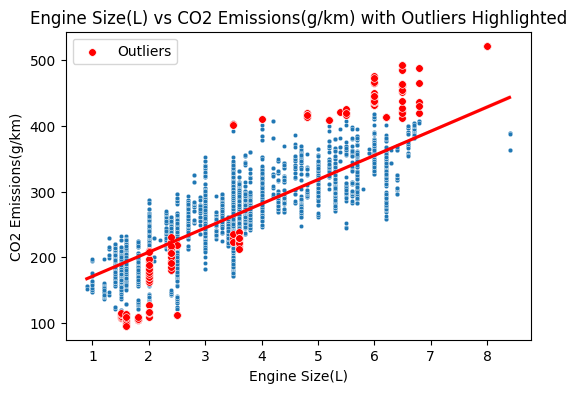

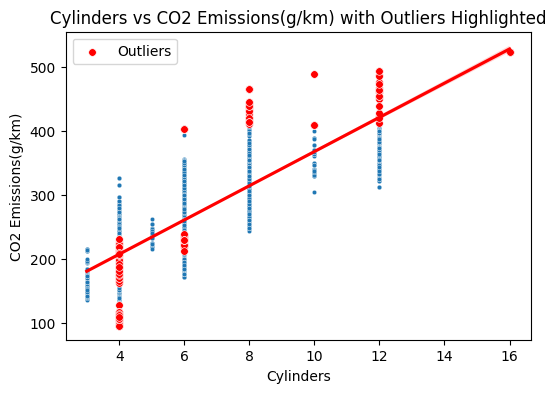

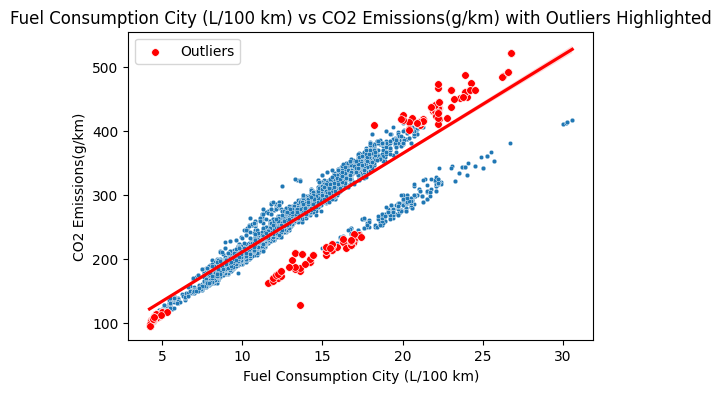

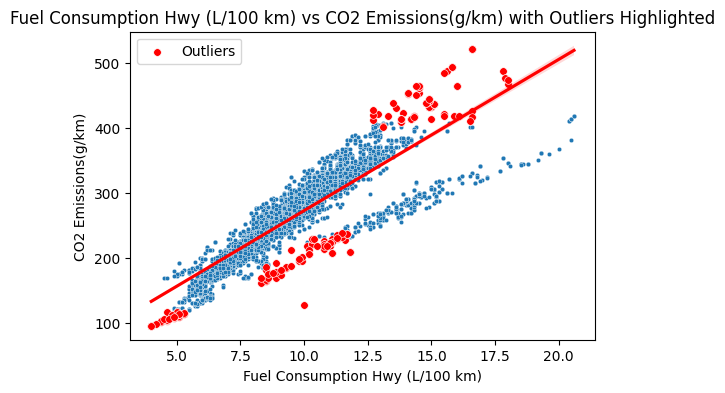

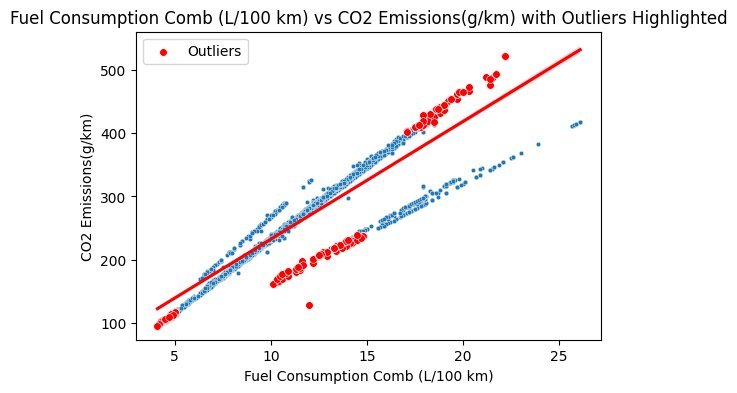

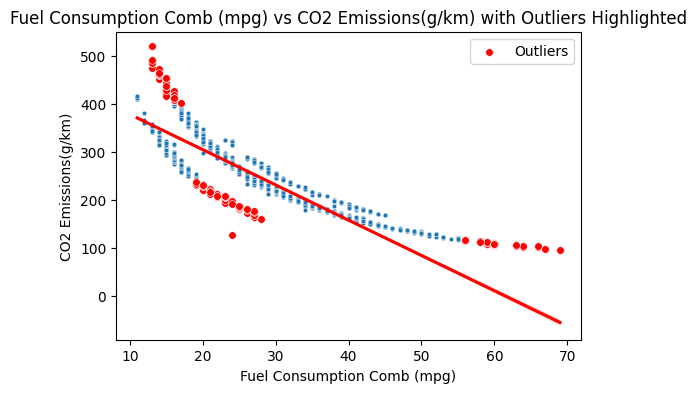

In [8]:
# Select numerical features with high correlation to CO2 Emissions
numerical_features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']

# Identify outliers based on residuals (using the outlier_indices from the previous cell's execution)
# Ensure outlier_indices is available from the previous run of cell 92112dab

for feature in numerical_features:
    plt.figure(figsize=(6, 4)) # Smaller plot size
    sns.scatterplot(x=feature, y='CO2 Emissions(g/km)', data=df, s=10, label='_nolegend_') # Plot all points with smaller size
    sns.scatterplot(x=df.loc[outlier_indices, feature], y=df.loc[outlier_indices, 'CO2 Emissions(g/km)'], color='red', s=30, label='Outliers') # Highlight outliers with smaller size
    sns.regplot(x=feature, y='CO2 Emissions(g/km)', data=df, scatter=False, color='red', line_kws={"color": "red"}) # Add best-fit line without scatter points
    plt.title(f'{feature} vs CO2 Emissions(g/km) with Outliers Highlighted')
    plt.legend()
    plt.show()

**8th:-** Develop a simple, interpretable model to estimate CO₂ emissions using relevant features from the dataset. Summarize how the model captures the relationship between vehicle characteristics and emissions.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Select features for the model
# Based on previous analysis, numerical features with high correlation and some categorical features are relevant
numerical_features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)']
categorical_features = ['Vehicle Class', 'Fuel Type']

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = 'passthrough'  # No transformation for numerical features initially
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # Use OneHotEncoder for categorical features

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create a linear regression model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LinearRegression())])

# Define features (X) and target (y)
X = df[numerical_features + categorical_features]
y = df['CO2 Emissions(g/km)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

display(f"Mean Squared Error: {mse:.2f}")
display(f"Root Mean Squared Error: {rmse:.2f}")
display(f"R-squared: {r2:.2f}")

# Summarize model interpretation
display("Model Coefficients:")
# Get the feature names after one-hot encoding
encoded_feature_names = model.named_steps['preprocessor'].get_feature_names_out(numerical_features + categorical_features)
coefficients = model.named_steps['regressor'].coef_

# Display coefficients for each feature
for feature, coef in zip(encoded_feature_names, coefficients):
    display(f"{feature}: {coef:.2f}")

display(f"\nModel Intercept: {model.named_steps['regressor'].intercept_:.2f}")

'Mean Squared Error: 31.01'

'Root Mean Squared Error: 5.57'

'R-squared: 0.99'

'Model Coefficients:'

'num__Engine Size(L): 0.05'

'num__Cylinders: 0.63'

'num__Fuel Consumption Comb (L/100 km): 22.48'

'cat__Vehicle Class_COMPACT: 0.80'

'cat__Vehicle Class_FULL-SIZE: 2.50'

'cat__Vehicle Class_MID-SIZE: 1.07'

'cat__Vehicle Class_MINICOMPACT: 0.42'

'cat__Vehicle Class_MINIVAN: 2.71'

'cat__Vehicle Class_PICKUP TRUCK - SMALL: 4.50'

'cat__Vehicle Class_PICKUP TRUCK - STANDARD: 2.58'

'cat__Vehicle Class_SPECIAL PURPOSE VEHICLE: 5.17'

'cat__Vehicle Class_STATION WAGON - MID-SIZE: 1.64'

'cat__Vehicle Class_STATION WAGON - SMALL: 0.67'

'cat__Vehicle Class_SUBCOMPACT: 1.25'

'cat__Vehicle Class_SUV - SMALL: 2.20'

'cat__Vehicle Class_SUV - STANDARD: 1.69'

'cat__Vehicle Class_TWO-SEATER: 1.23'

'cat__Vehicle Class_VAN - CARGO: -17.92'

'cat__Vehicle Class_VAN - PASSENGER: -10.51'

'cat__Fuel Type_D: 50.78'

'cat__Fuel Type_E: -92.68'

'cat__Fuel Type_X: 20.74'

'cat__Fuel Type_Z: 21.16'

'\nModel Intercept: -17.27'

In this  linear regression model to estimate CO₂ emissions using 'Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)', 'Vehicle Class', and 'Fuel Type'.

The model's performance metrics (MSE, RMSE, and R-squared) indicate a very good fit to the data, meaning it can explain a large portion of the variance in CO2 emissions.

The model coefficients provide insights into how each feature influences the estimated CO2 emissions:

Positive coefficients (e.g., Fuel Consumption Comb (L/100 km), Engine Size(L), Cylinders) indicate that as the value of these features increases, the estimated CO2 emissions also increase, holding other features constant.
The magnitude of the coefficient suggests the strength of the influence. For example, Fuel Consumption Comb (L/100 km) has a relatively large positive coefficient, indicating it's a strong predictor of CO2 emissions.
For categorical features (like Vehicle Class and Fuel Type), the coefficients for each category represent the estimated difference in CO2 emissions compared to a baseline category (which is implicitly included in the intercept). For instance, a positive coefficient for a specific Vehicle Class means vehicles in that class tend to have higher emissions than the baseline vehicle class, holding other features constant.
In essence, the model captures the linear relationships between the selected vehicle characteristics and CO2 emissions, allowing us to understand the direction and magnitude of each feature's influence on emissions.

**9th:-** Assess how well the model performs in estimating emissions. Reflect on the meaning of the performance metrics and what they indicate about model reliability

In [10]:
# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

display(f"Mean Squared Error: {mse:.2f}")
display(f"Root Mean Squared Error: {rmse:.2f}")
display(f"R-squared: {r2:.2f}")

'Mean Squared Error: 31.01'

'Root Mean Squared Error: 5.57'

'R-squared: 0.99'

Here's what these metrics indicate about the model's reliability:

Mean Squared Error (MSE): This is the average of the squared differences between the actual CO2 emission values and the values predicted by the model. A lower MSE indicates that the model's predictions are closer to the actual values on average. Our MSE of 31.01 means the average squared difference between predicted and actual emissions is 31.01 (g/km)$^2$$^2$.

Root Mean Squared Error (RMSE): This is the square root of the MSE and is in the same units as the target variable (CO2 emissions in g/km). It provides a measure of the typical difference between the predicted and actual values. Our RMSE of 5.57 means that, on average, the model's predictions are about 5.57 g/km away from the actual CO2 emissions. Considering the range of CO2 emissions in the dataset, an RMSE of 5.57 suggests a relatively good performance.

R-squared (R²): This metric represents the proportion of the variance in the dependent variable (CO2 emissions) that is predictable from the independent variables (the features used in the model). It ranges from 0 to 1, where a higher R-squared indicates that the model explains a larger proportion of the variance. Our R-squared of 0.99 is very close to 1, which means that approximately 99% of the variation in CO2 emissions can be explained by the features included in our model. This indicates that the model has a very strong fit to the data.

In summary: The low MSE and RMSE, coupled with a very high R-squared value (0.99), suggest that the simple linear regression model performs very well in estimating CO2 emissions based on the selected features. The model is able to explain a large majority of the variability in emissions and provides predictions that are, on average, close to the actual values. This indicates a high level of reliability for this model within the context of this dataset and the chosen features.

**10th:-** Based on the analysis and model findings, summarize which factors most strongly influence CO₂ emissions and suggest how such insights could support emission reduction efforts.

Based on the analysis and model findings:

The factors that most strongly influence CO₂ emissions are primarily related to fuel consumption (Fuel Consumption Comb (L/100 km), Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km), and Fuel Consumption Comb (mpg)), engine characteristics (Engine Size(L) and Cylinders), vehicle type (Vehicle Class), and fuel type (Fuel Type). The linear regression model confirmed the strong positive correlation of fuel consumption, engine size, and cylinders with CO2 emissions, and the significant influence of vehicle class and fuel type as indicated by the categorical feature coefficients.

These insights can support emission reduction efforts in several ways:

Targeted Design and Manufacturing: Automotive manufacturers can prioritize improving fuel efficiency and optimizing engine design, especially for vehicle classes and fuel types that contribute more significantly to emissions.

Policy Making: Governments and regulatory bodies can use these findings to inform policies related to fuel economy standards, vehicle taxation based on emission levels, and incentives for purchasing vehicles with lower emissions.

Consumer Awareness and Choice: Providing consumers with clear information about how vehicle features like engine size, fuel type, and vehicle class impact CO2 emissions can empower them to make more environmentally conscious purchasing decisions.

Identifying Areas for Innovation: The outliers identified in the analysis could point to vehicles with unusually high or low emissions for their characteristics. Investigating these cases further could reveal areas for technological innovation or highlight specific models to avoid or promote.

Monitoring and Evaluation: The model developed can serve as a baseline to monitor changes in average CO2 emissions over time and evaluate the effectiveness of implemented emission reduction strategies.

By understanding the key drivers of CO2 emissions, stakeholders in the automotive sector can develop more effective strategies to reduce the environmental impact of vehicles.

'Correlation matrix for numerical features:'

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km)
Engine Size(L),1.000000,0.927653,0.817060
Cylinders,0.927653,1.000000,0.780534
Fuel Consumption Comb (L/100 km),0.817060,0.780534,1.000000


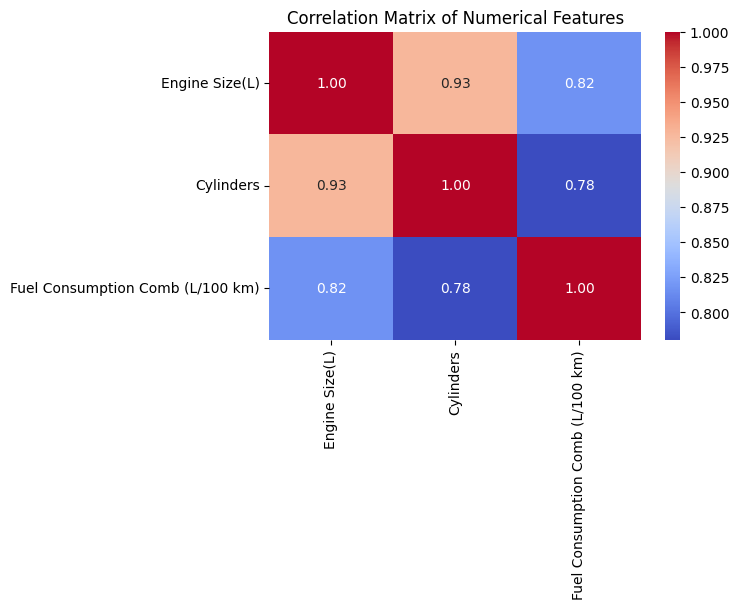

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df = pd.read_csv('/content/CO2_Emissions.csv')

# Select the numerical features used in the model
numerical_features_model = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)']

# Calculate the correlation matrix for these features
correlation_matrix_numerical = df[numerical_features_model].corr()

# Display the correlation matrix
display("Correlation matrix for numerical features:", correlation_matrix_numerical)

# Optionally, visualize the correlation matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_numerical, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()